[Reference](https://towardsdatascience.com/what-is-pytorch-a84e4559f0e3)

In [12]:
import torch
import numpy as np

In [2]:
numpy.array([[0.1, 1.2], [2.2, 3.1], [4.9, 5.2]])

array([[0.1, 1.2],
       [2.2, 3.1],
       [4.9, 5.2]])

In [3]:
torch.tensor([[0.1, 1.2], [2.2, 3.1], [4.9, 5.2]])

tensor([[0.1000, 1.2000],
        [2.2000, 3.1000],
        [4.9000, 5.2000]])

In [4]:
w = torch.empty(3, 3)
print(w,'\n', w.shape, '\n')

x = torch.randn(3, 3, 7)
print(x,'\n', x.shape, '\n')

y = torch.zeros(3, 3)
print(y,'\n', y.shape, '\n')

z = torch.ones(3, 3)
print(z,'\n', z.shape, '\n')

tensor([[9.2023e-36, 0.0000e+00, 3.3631e-44],
        [0.0000e+00,        nan, 0.0000e+00],
        [1.1578e+27, 1.1362e+30, 7.1547e+22]]) 
 torch.Size([3, 3]) 

tensor([[[ 0.0599,  0.0784,  0.5646, -0.4372, -0.7951,  0.5459, -1.1365],
         [-0.0717, -1.9797, -0.8917, -0.7289,  0.8037,  1.2797, -0.1884],
         [-0.1892, -0.0425,  2.3589, -0.9690, -0.0119, -0.5562,  0.8762]],

        [[ 0.5833, -1.8529,  0.3437,  1.6903, -1.0851,  0.8746,  0.5598],
         [-0.6187, -0.8489, -0.5150, -1.8747,  0.1193,  0.4766,  0.7997],
         [ 0.8004, -0.3054,  0.4264, -1.5618, -1.9139, -0.2291,  0.6990]],

        [[ 1.3206, -1.2237,  0.6143, -1.0821,  1.0285,  2.8657, -0.4120],
         [-0.1154, -0.8452,  0.8125,  1.9549,  0.5650, -0.3415, -1.5168],
         [-0.7035,  0.5831,  0.8965,  1.6364,  0.4752,  0.9494, -0.1453]]]) 
 torch.Size([3, 3, 7]) 

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]) 
 torch.Size([3, 3]) 

tensor([[1., 1., 1.],
        [1., 1., 1.],
      

In [5]:
x = torch.rand(100,50)
print(x.shape)

y=x.view(20,5,50)
print(y.shape)

z=x.view(-1,5,50)
print(z.shape)

torch.Size([100, 50])
torch.Size([20, 5, 50])
torch.Size([20, 5, 50])


In [6]:
cpu=torch.device("cpu")
gpu=torch.device("cuda:0") # GPU 0

# Create tensor with CPU
x=torch.ones(3,3, device=cpu)
print("CPU:",x.device)

x=torch.ones(3,3, device=gpu)
print("GPU:",x.device)

x=torch.ones(3,3).cuda(0)
print("CPU to GPU:",x.device)

x=torch.ones(3,3, device=gpu).cpu()
print("GPU to CPU:",x.device)

CPU: cpu
GPU: cuda:0
CPU to GPU: cuda:0
GPU to CPU: cpu


In [7]:
import time
x=torch.rand(10000,10000)
y=torch.rand(10000,10000)

t = time.time()
z=x@y
t = time.time()-t

print(t)

27.271507024765015


In [9]:
yc=y.cuda(0)
t = time.time()
z=yc@yc
t = time.time()-t
print(t)

0.022306442260742188


In [13]:
a = np.ones(5)
b = torch.from_numpy(a)

print('a:',a)
print('b:',b)

a: [1. 1. 1. 1. 1.]
b: tensor([1., 1., 1., 1., 1.], dtype=torch.float64)


In [14]:
x = torch.arange(4.).view(4,1)
x.requires_grad=True
print('x^T =',x.t())

y=0.5*x.t()@x

y.backward()
x.grad

x^T = tensor([[0., 1., 2., 3.]], grad_fn=<TBackward>)


tensor([[0.],
        [1.],
        [2.],
        [3.]])

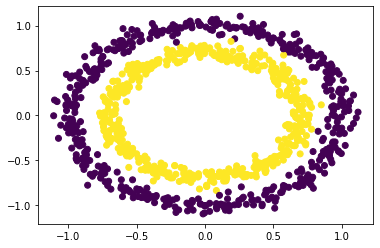

In [15]:
import sklearn.datasets as datasets
import matplotlib.pyplot as plt
dat, lbs = datasets.make_circles(n_samples=1000, shuffle=True, noise=0.05, random_state=True, factor=0.7)

plt.scatter(dat[:,0], dat[:,1], c=lbs)

In [16]:
import torch.nn as nn
import torch.nn.functional as F

#Subclassing nn.Module
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1=nn.Linear(2,100)
        self.fc2=nn.Linear(100,2)

    def forward(self, x):
      
        x=F.relu(self.fc1(x))
        x=self.fc2(x)
        return F.softmax(x, dim=1)
    
net=Net().cuda()

net

Net(
  (fc1): Linear(in_features=2, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=2, bias=True)
)

In [23]:
#Split into training and test set
torch.set_default_dtype(torch.float32)
input=torch.tensor(dat, dtype=torch.float32).cuda()
train = input[:800]
lab_train=torch.tensor(lbs[:800]).cuda()

test  = input[800:]
lab_test =torch.tensor(lbs[800:]).cuda()

#Split the training and test set into batches

train = train.view(-1,10,2)
lab_train=lab_train.view(-1,10)
test  = test.view(-1,2)
lab_test=lab_test

print("Train shape:", train.shape)
print("test shape: ", test.shape)

Train shape: torch.Size([80, 10, 2])
test shape:  torch.Size([200, 2])


In [24]:
import torch.optim as optim

#Define loss function
criterion = nn.CrossEntropyLoss()

#Use stochastic gradient descent to optimize the function
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

#Training
for epoch in range(20):

    loss_promedio = 0.0
    for i, data in enumerate(zip(train, lab_train)):
        inputs, labels = data
        
        # Set the gradient in zero to clear the gradient in the last iteration
        optimizer.zero_grad()

        # Feed the inputs to the neural network
        outputs = net(inputs)
        
        # Calculation the loss
        loss = criterion(outputs, labels)

        # Backpropagation to calculate the gradient
        loss.backward()

        # Apply stochastic gradient descent to minimize the loss
        optimizer.step()

        # Show the average loss for every 10 iterations
        loss_promedio += loss.item()
        if i % 10 == 9:
            print('Epoch : %d\t  Batch: %d\t loss: %.3f' %(epoch + 1, i + 1, loss_promedio / 10))
            
            loss_promedio = 0.0

Epoch : 1	  Batch: 10	 loss: 0.703
Epoch : 1	  Batch: 20	 loss: 0.700
Epoch : 1	  Batch: 30	 loss: 0.692
Epoch : 1	  Batch: 40	 loss: 0.694
Epoch : 1	  Batch: 50	 loss: 0.696
Epoch : 1	  Batch: 60	 loss: 0.696
Epoch : 1	  Batch: 70	 loss: 0.688
Epoch : 1	  Batch: 80	 loss: 0.690
Epoch : 2	  Batch: 10	 loss: 0.696
Epoch : 2	  Batch: 20	 loss: 0.692
Epoch : 2	  Batch: 30	 loss: 0.689
Epoch : 2	  Batch: 40	 loss: 0.690
Epoch : 2	  Batch: 50	 loss: 0.693
Epoch : 2	  Batch: 60	 loss: 0.691
Epoch : 2	  Batch: 70	 loss: 0.685
Epoch : 2	  Batch: 80	 loss: 0.687
Epoch : 3	  Batch: 10	 loss: 0.691
Epoch : 3	  Batch: 20	 loss: 0.688
Epoch : 3	  Batch: 30	 loss: 0.686
Epoch : 3	  Batch: 40	 loss: 0.687
Epoch : 3	  Batch: 50	 loss: 0.689
Epoch : 3	  Batch: 60	 loss: 0.687
Epoch : 3	  Batch: 70	 loss: 0.682
Epoch : 3	  Batch: 80	 loss: 0.684
Epoch : 4	  Batch: 10	 loss: 0.687
Epoch : 4	  Batch: 20	 loss: 0.685
Epoch : 4	  Batch: 30	 loss: 0.683
Epoch : 4	  Batch: 40	 loss: 0.684
Epoch : 4	  Batch: 5

In [25]:
outputs=net(test)

# Choose the prediction with higher probability
_, predicted = torch.max(outputs, 1)

# Find the average accuracy of all the examples in the test
acc=(lab_test==predicted).sum().double()/200
print("Test accuracy:",acc.item())

Test accuracy: 0.91
